# Admissions
Scott Schmidt; Illinois State Univeristy; 

Data Analytics BUS 471 using R.

# View Data

In [1]:
install.packages("xlsx")
library("xlsx")
library(data.table)
library(caret)
library(gbm)
options(warn=-1)

file='../input/import/Import_Data.xlsx'
df= read.xlsx(file, 1, header=TRUE)
head(df)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rJava’, ‘xlsxjars’


Loading required package: ggplot2

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:httr’:

    progress


Loaded gbm 2.1.8



,Student,Decision,SAT,Female,HSGPA
,<dbl>,<chr>,<dbl>,<chr>,<dbl>
1,1,Deny,873,No,2.57
2,2,Deny,861,Yes,2.65
3,3,Admit,1416,No,4.02
4,4,Deny,1135,No,2.63
5,5,Admit,1381,No,4.20
6,6,Deny,1114,Yes,2.43


# Treat Missing Values

In [2]:
df <- na.omit(df)

# Encode Data
Deny will become 0 and Admit will become 1.
Male/Female will also become 1 and 0.

In [3]:
df$Decision<-ifelse(df$Decision=="Admit",1,0)
df$Female<-ifelse(df$Female=="Yes",1,0)
head(df, 7)

,Student,Decision,SAT,Female,HSGPA
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,873,0,2.57
2,2,0,861,1,2.65
3,3,1,1416,0,4.02
4,4,0,1135,0,2.63
5,5,1,1381,0,4.20
6,6,0,1114,1,2.43
7,7,1,1544,0,3.20


# GroupBy and Sort

In [4]:
satScore=900
length(which(df$SAT>satScore))
length(which(df$SAT>satScore & df$Female==0))

[1] 1059

[1] 523

In [5]:
sortDF <- df[order(df$SAT, df$HSGPA, df$Female),]
View(sortDF)

,Student,Decision,SAT,Female,HSGPA
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
713,713,0,800,0,3.88
738,738,0,801,0,2.22
337,337,0,802,0,2.48
509,509,0,802,0,4.42
115,115,0,806,1,2.97
873,873,0,806,1,3.70
221,221,0,806,1,3.86
325,325,0,807,1,3.69
388,388,0,808,1,2.71


In [6]:
guyCount=length(which(df$Female==0))
girlCount=length(which(df$Female==1))

paste(guyCount, " is guy count")
paste(girlCount, " is girl count")

guySCount=length(which(df$Female==0 & df$SAT>1100))
girlSCount=length(which(df$Female==1 & df$SAT>1100))

paste(guySCount, " is guy count")
paste(girlSCount, " is girl count")

[1] "616  is guy count"

[1] "614  is girl count"

[1] "359  is guy count"

[1] "401  is girl count"

# Graphs

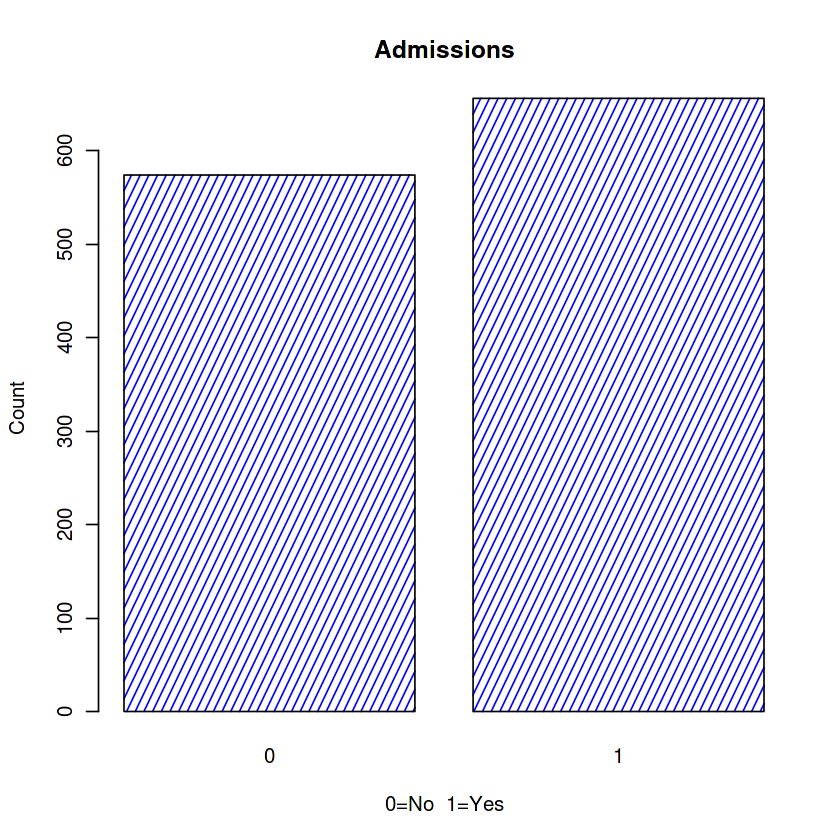

In [7]:
barplot(table(df$Decision),
main="Admissions",
xlab="0=No  1=Yes",
ylab="Count",
border="black",
col="blue",
density=10
)

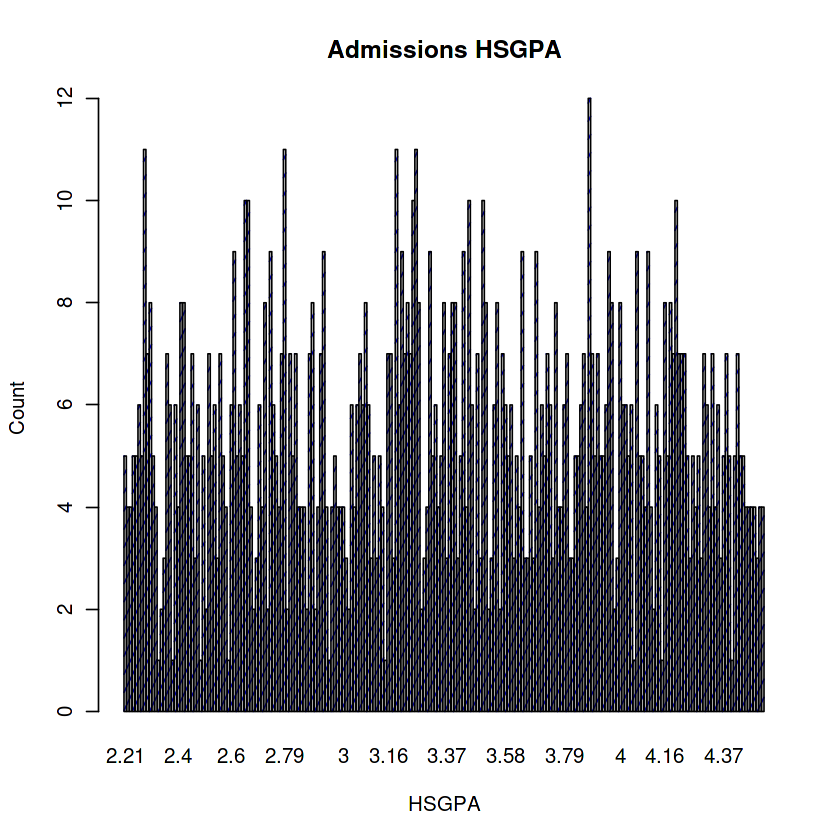

In [8]:
barplot(table(df$HSGPA),
main="Admissions HSGPA",
xlab="HSGPA",
ylab="Count",
border="black",
col="blue",
density=10
)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



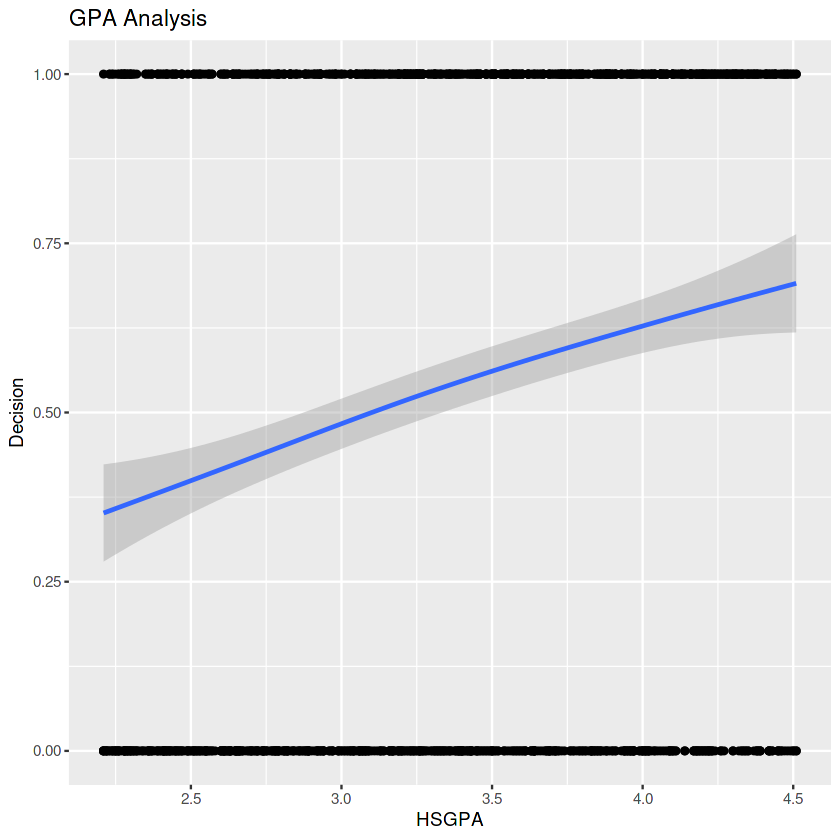

In [9]:
# There seems to be a positive correlation between GPA and acceptance. 
library(ggplot2)
ggplot(df, aes(x=HSGPA, y=Decision), color=cut)+ geom_point() + geom_smooth() + labs(title="GPA Analysis")

# Correlations

corrplot 0.92 loaded



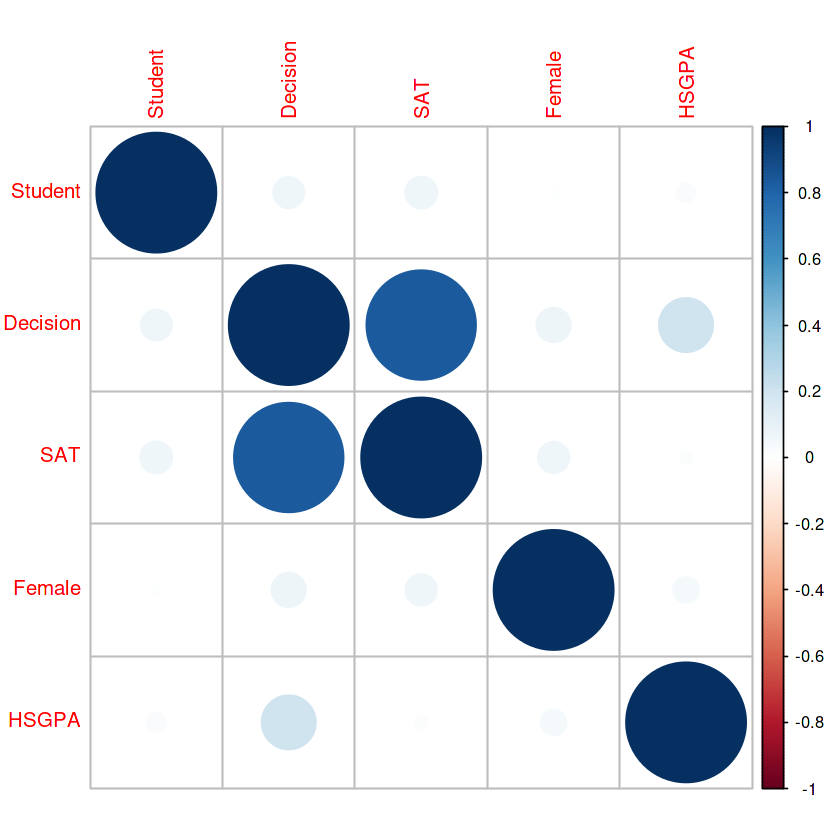

In [10]:
library(corrplot)
correlations <- cor(df)
corrplot(correlations, method="circle")

# Split Data

In [11]:
install.packages("caTools")       
library(caTools)
library(Metrics)

# Splitting data in train and test data
split <- sample.split(df, SplitRatio = 0.7)
split
  
train <- subset(df, split == "TRUE")
test <- subset(df, split == "FALSE")
head(train)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘Metrics’


The following objects are masked from ‘package:caret’:

    precision, recall




[1] FALSE  TRUE  TRUE FALSE  TRUE

,Student,Decision,SAT,Female,HSGPA
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,2,0,861,1,2.65
3,3,1,1416,0,4.02
5,5,1,1381,0,4.20
7,7,1,1544,0,3.20
8,8,1,1356,0,4.29
10,10,0,1061,1,3.32


In [12]:
trainX=train[-2];
#print(varX);
trainY=train$Decision;
testX=test[-2]
testY=test$Decision;

# Logistic Regression

In [13]:
mylogit <- glm(Decision ~ SAT + HSGPA + Female, data = train)
summary(mylogit)


Call:
glm(formula = Decision ~ SAT + HSGPA + Female, data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.54529  -0.19170  -0.01859   0.18646   0.58877  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.073e+00  6.645e-02 -31.199   <2e-16 ***
SAT          1.762e-03  3.989e-05  44.181   <2e-16 ***
HSGPA        1.421e-01  1.455e-02   9.765   <2e-16 ***
Female       4.426e-02  1.864e-02   2.374   0.0178 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.0636234)

    Null deviance: 183.84  on 737  degrees of freedom
Residual deviance:  46.70  on 734  degrees of freedom
AIC: 67.319

Number of Fisher Scoring iterations: 2


In [14]:
pscl::pR2(mylogit)["McFadden"]

fitting null model for pseudo-r2


McFadden 
0.9463625

# Random Forest

In [15]:
library(randomForest)
set.seed(120)  

forestMAE <- list()
forestR2  <- list()
forestDepth <- list()

for (x in 1:9) {
  classifier_RF = randomForest(x = trainX,
                             y = trainY,
                             ntree = 200,
                             maxdepth= x,
                            )
    #classifier_RF
    #print(classifier_RF)
    y_pred = predict(classifier_RF, newdata = testX)
    
    fR2 = R2(y_pred, testY)
    fRMSE = RMSE(y_pred, testY)
    fMAE = mae(y_pred, testY)
    
    forestMAE <- append(forestMAE, fMAE)
    forestR2 <- append(forestR2, fR2)
    forestDepth <- append(forestDepth, x)
}

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




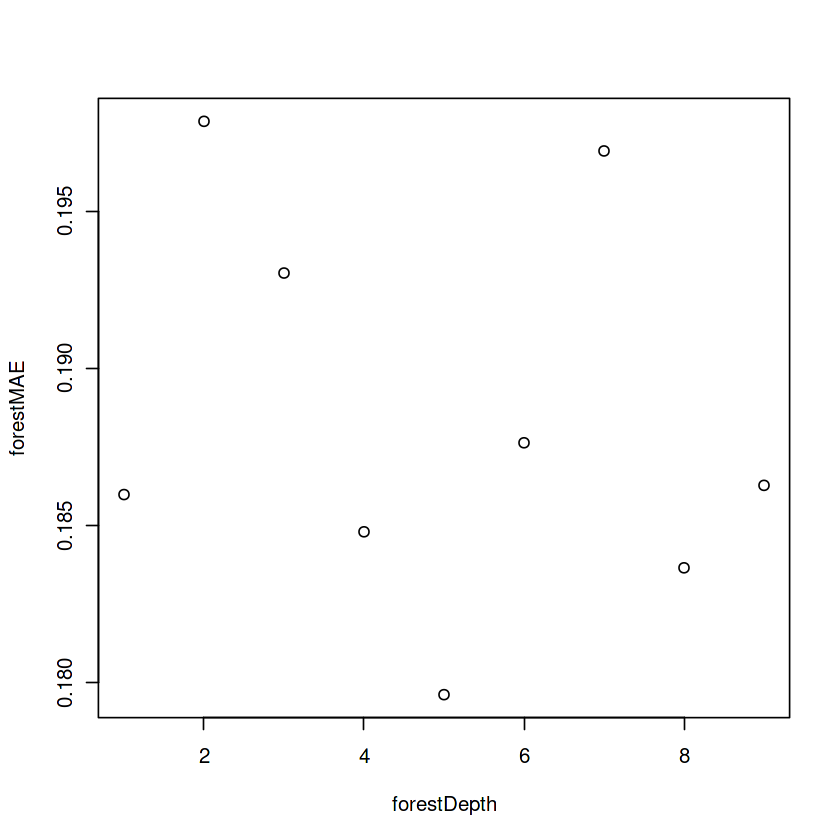

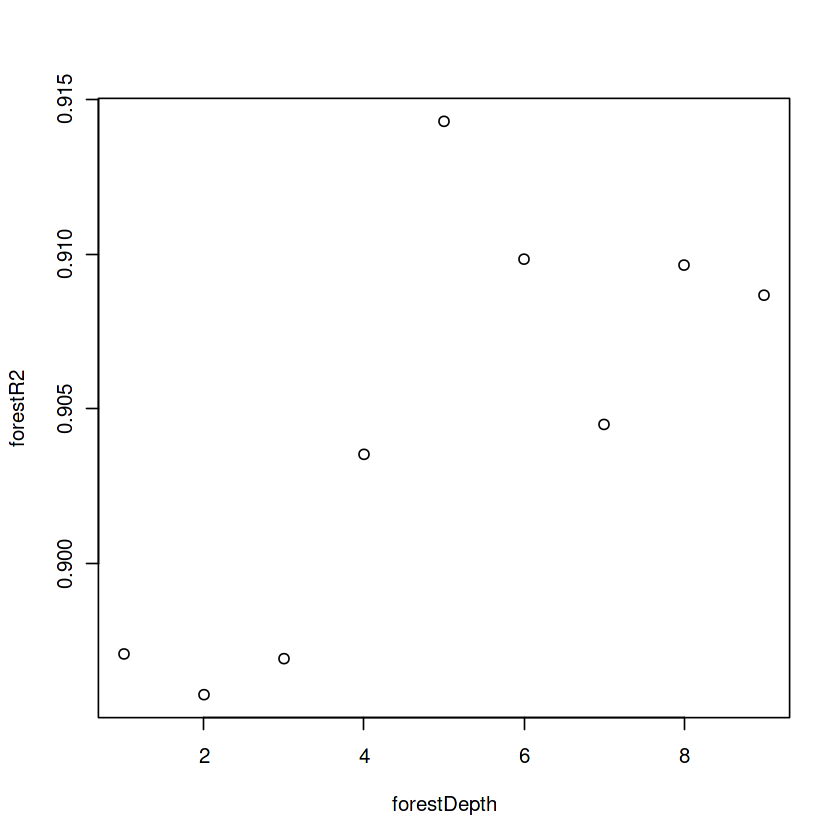

In [16]:
plot(forestDepth, forestMAE)
plot(forestDepth, forestR2)

#### Final Forest Prediction

In [17]:
# Fitting Random Forest to the train dataset
classifier_RF = randomForest(x = trainX,
                             y = trainY,
                             ntree = 500,
                             maxdepth= 3,
                            )
classifier_RF


Call:
 randomForest(x = trainX, y = trainY, ntree = 500, maxdepth = 3) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 0.04043968
                    % Var explained: 83.77

In [18]:
# random forest metrics:
forestR2 = R2(y_pred, testY)
forestRMSE = RMSE(y_pred, testY)
forestMAE = mae(y_pred, testY)
paste(forestR2, " forest r2")
paste(forestMAE, " forest MAE" )

[1] "0.908673279138436  forest r2"

[1] "0.186283330852476  forest MAE"

,IncNodePurity
Student,6.647287
SAT,113.189134
Female,1.972256
HSGPA,14.955004


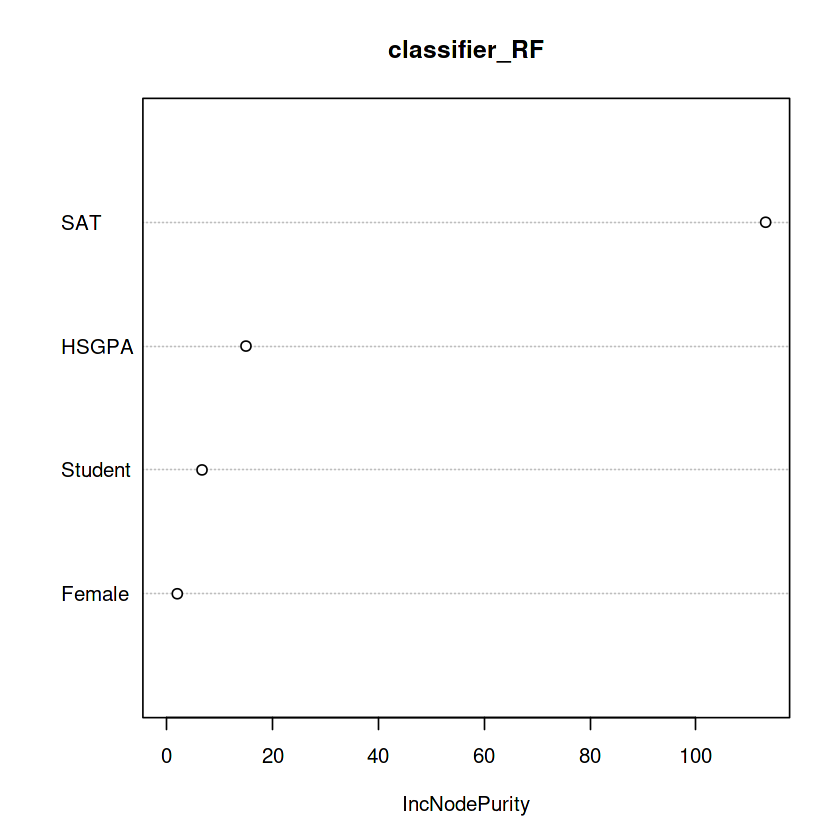

In [19]:
# FEATURE IMPORTANCE:
importance(classifier_RF)
varImpPlot(classifier_RF)

# Decision Tree

In [20]:
library(rpart)
library(rpart.plot)
library(pROC)
library(tree)

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following object is masked from ‘package:Metrics’:

    auc


The following objects are masked from ‘package:stats’:

    cov, smooth, var




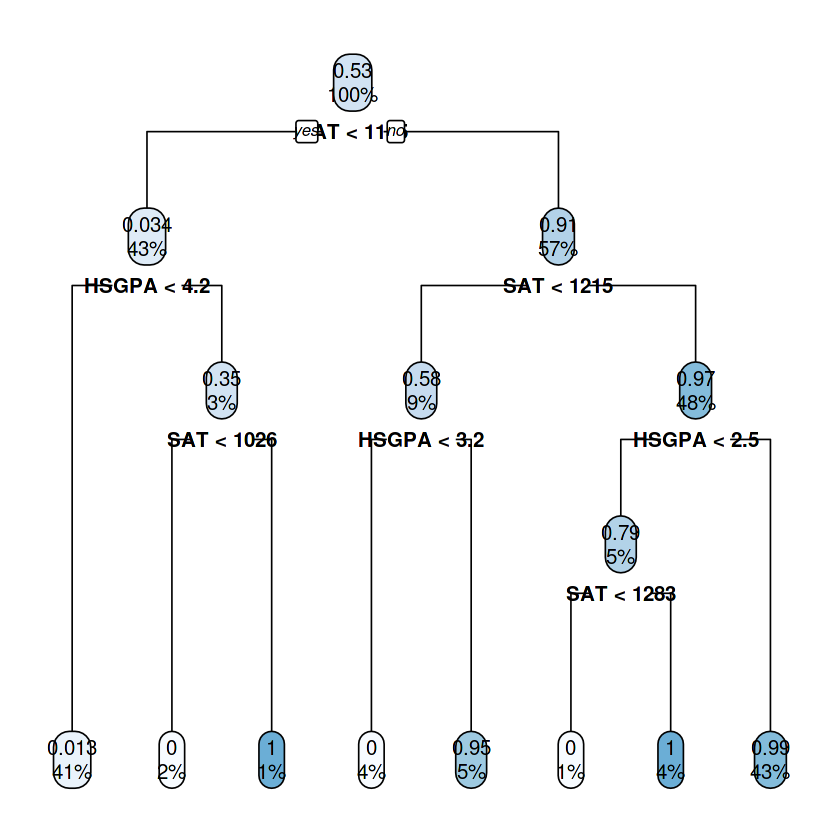

In [21]:
tree <- rpart(trainY ~., data = trainX)
rpart.plot(tree)

# KNN 

In [22]:
library("class")

knnPred <- knn(trainX, testX, trainY, k=3, prob=TRUE)
table(testY, knnPred)

     knnPred
testY   0   1
    0 195  32
    1  25 240

In [23]:
#print(data.frame(testY, knnPred))

mse = mean((testY - knnPred)^2)
mae = caret::MAE(testY, knnPred)
rmse = caret::RMSE(testY, knnPred)

cat("MSE: ", mse, "MAE: ", mae, " RMSE: ", rmse)

MSE:  NA MAE:  NA  RMSE:  NA

classifier_knn <- knn(train = trainX,
                      test = testX,
                      cl = testY,
                      k = 1)
classifier_knn
  
# Confusiin Matrix
cm <- table(testY, classifier_knn)
cm
  
# Model Evaluation - Choosing K
# Calculate out of Sample error
misClassError <- mean(classifier_knn != testY)
print(paste('Accuracy =', 1-misClassError))